In [1]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install ultralytics --upgrade


In [3]:
import ultralytics
ultralytics.checks()


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.5/112.6 GB disk)


In [4]:
!pip install ultralytics roboflow supervision


In [5]:
from roboflow import Roboflow

rf = Roboflow(api_key="wraQ5Z8NaxoKsxyt9TFm")
project = rf.workspace("ayu-asipq").project("calory")
dataset = project.version(1).download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Calory-1 in yolov11:: 100%|██████████| 1960/1960 [00:00<00:00, 5941.80it/s]


TRAINING YOLOv12

In [6]:
!ls /content


Calory-1  drive


In [7]:
import torch
print(torch.cuda.is_available())


True


In [8]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

model.train(
    data="/content/Calory-1/data.yaml",   # ← path yang benar
    epochs=50,
    imgsz=640,
    batch=16,
    patience=20,
    pretrained=True,
    device=0   # GPU aktif
)


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Calory-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  4,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b1d301dff50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0

In [9]:
!find /content/runs/detect -name "best.pt"


/content/runs/detect/train/weights/best.pt


In [22]:
!cp /content/runs/train/exp/best.pt /content/drive/MyDrive/


cp: cannot stat '/content/runs/train/exp/best.pt': No such file or directory


In [10]:
!pip install -qU ultralytics supervision

In [11]:
import cv2
import supervision as sv
from ultralytics import YOLO

In [18]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [19]:
calorie_info = {
    "Ayam Goreng": "260 kal / 100 g",
    "Capcay": "67 kal / 100 g",
    "Nasi": "129 kal / 100 g",
    "Sayur Bayam": "36 kal / 100 g",
    "Sayur Kangkung": "98 kal / 100 g",
    "Sayur Sop": "22 kal / 100 g",
    "Tahu": "80 kal / 100 g",
    "Telur Dadar": "93 kal / 100 g",
    "Telur Mata Sapi": "110 kal / 1 butir",
    "Telur Rebus": "78 kal / 1 butir",
    "Tempe": "225 kal / 100 g",
    "Tumis Buncis": "65 kal / 100 g",
    "food-z7P4": "-"
}


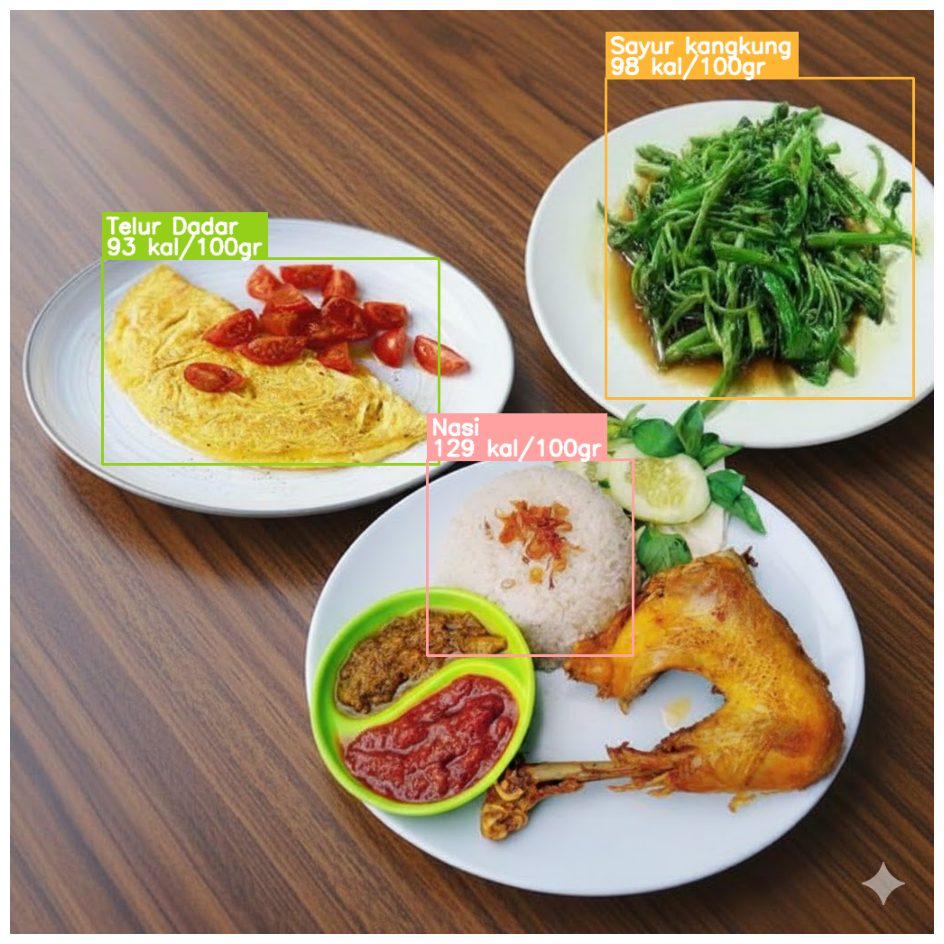

Detections(xyxy=array([[     660.32,      75.385,      1001.2,      430.98],
       [     102.69,      275.85,      475.52,      503.44],
       [     462.17,       498.8,      690.89,      715.99]], dtype=float32), mask=None, confidence=array([    0.61536,     0.52106,     0.25997], dtype=float32), class_id=array([4, 7, 2]), tracker_id=None, data={'class_name': array(['Sayur kangkung -98 kal per 100gr-', 'Telur Dadar -93 kal per 100gr-', 'Nasi -129 kal per 100gr-'], dtype='<U33')}, metadata={})

In [20]:
image = cv2.imread('/content/drive/MyDrive/Capstone 4/test_food.jpg')

# Inference
results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

# Annotators
box_annotator = sv.BoxAnnotator(thickness=2)
label_annotator = sv.LabelAnnotator(
    text_scale=0.8,
    text_thickness=2,
    text_padding=5
)

# ------------ FORMAT LABEL PER BARIS -------------
labels = []
for class_id in detections.class_id:
    raw_name = model.names[int(class_id)]  # contoh: "Nasi -129 kal per 100gr-"

    # Pisahkan 2 bagian (nama & kalori)
    parts = raw_name.split("-")
    food_name = parts[0].strip()                   # "Nasi"
    calorie_raw = parts[1].replace("kal per", "").replace("100gr", "").strip()

    # Format lebih rapi → "129 kal/100gr"
    calorie_clean = f"{calorie_raw} kal/100gr"

    # Gabungkan jadi 2 baris
    label = f"{food_name}\n{calorie_clean}"
    labels.append(label)
# --------------------------------------------------

# Draw annotation
annotated_image = box_annotator.annotate(
    scene=image.copy(),
    detections=detections
)

annotated_image = label_annotator.annotate(
    scene=annotated_image,
    detections=detections,
    labels=labels
)

sv.plot_image(annotated_image)

detections


In [21]:
detections

Detections(xyxy=array([[     660.32,      75.385,      1001.2,      430.98],
       [     102.69,      275.85,      475.52,      503.44],
       [     462.17,       498.8,      690.89,      715.99]], dtype=float32), mask=None, confidence=array([    0.61536,     0.52106,     0.25997], dtype=float32), class_id=array([4, 7, 2]), tracker_id=None, data={'class_name': array(['Sayur kangkung -98 kal per 100gr-', 'Telur Dadar -93 kal per 100gr-', 'Nasi -129 kal per 100gr-'], dtype='<U33')}, metadata={})